In [1]:
import pandas as pd
import prepare as pr

In [16]:
from importlib import reload

Imports for some quick exploration and pulling bigrams

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# import modules
import env
from wordcloud import WordCloud

Imports for modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
seed = 42
target = 'language'

In [25]:
reload(pr)

<module 'prepare' from '/Users/nadina/codeup-data-science/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/prepare.py'>

In [18]:
df = pr.get_clean_df()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   original     432 non-null    object  
 1   first_clean  432 non-null    object  
 2   clean        432 non-null    object  
 3   lemmatized   432 non-null    object  
 4   language     432 non-null    category
dtypes: category(1), object(4)
memory usage: 14.2+ KB


In [105]:
X_train, X_validate, X_test, y_train, y_validate, y_test = pr.split_data(df, explore=False)

In [30]:
X_train

,original,first_clean,clean,lemmatized
271,[![Build Status](https://travis-ci.org/guardia...,[![Build Status,build status,build status
344,# DesignSpace\n\nhttps://www.youtube.com/watch...,# DesignSpace DesignSpace is a prototype d...,designspace designspace prototype design tool ...,designspace designspace prototype design tool ...
23,Photoshop Design Space [![Build Status](https:...,Photoshop Design Space [![Build Status file a...,photoshop design build status file root reposi...,photoshop design build status file root reposi...
190,# Learning to Adapt Structured Output Space fo...,# Learning to Adapt Structured Output Space fo...,learning adapt structured output semantic segm...,learning adapt structured output semantic segm...
22,# PySpace\nGLSL Fractal Ray Marcher in Python\...,# PySpace GLSL Fractal Ray Marcher in Python ...,pyspace glsl fractal ray marcher python instal...,pyspace glsl fractal ray marcher python instal...
...,...,...,...,...
220,"# SpaceTextWatcher\nandroid输入框输入银行卡,输入手机,输入身份证...","# SpaceTextWatcher android输入框输入银行卡,输入手机,输入身份证格...",spacetextwatcher android spacetextwatcher qq qq,spacetextwatcher android spacetextwatcher qq qq
123,[![discord](https://discordapp.com/api/guilds/...,[![discord .,discord,discord
242,# dl4j-tutorials\n\ndeeplearning4j 教程\n\n视频教程列...,# dl4j-tutorials deeplearning4j 教程 视频教程列表：[D...,dljtutorials deeplearningj deeplearningj java ...,dljtutorials deeplearningj deeplearningj java ...
183,=============\nopenwisp-ipam\n=============\n\...,============= openwisp-ipam ============= .. ...,openwispipam image target aopenwispipamcibuild...,openwispipam image target aopenwispipamcibuild...


In [71]:
tfidf = TfidfVectorizer()
X_tfid = tfidf.fit_transform(X_train.lemmatized)
X_tfid_val = tfidf.transform(X_validate.lemmatized)
X_tfid_test = tfidf.transform(X_test.lemmatized)
pd.DataFrame(X_tfid.todense(), 
             columns=tfidf.get_feature_names_out())

,aabb,aaro,ab,ability,abis,able,abramov,absence,absorb,abuild,...,york,youtube,yum,zdepth,zero,zip,ziptar,zodiusinfuser,zoom,zoomrotate
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.098916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098916
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
237,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
238,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
239,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [33]:
idf_values = pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

In [34]:
idf_values.describe()

count    4926.000000
mean        5.502317
std         0.537511
min         2.299283
25%         5.390325
50%         5.795791
75%         5.795791
max         5.795791
dtype: float64

Decision Tree

In [42]:
tree = DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(X_tfid, y_train)
tree.score(X_tfid, y_train)

0.6431535269709544

In [40]:
idf_values[idf_values < 4]

action     3.849880
add        3.444415
also       3.270062
andor      3.780888
api        3.598566
             ...   
whether    3.780888
without    2.878020
work       3.087740
working    3.544499
would      3.923988
Length: 141, dtype: float64

In [41]:
import xgboost as xgb

In [46]:
tfidf_bigrams = TfidfVectorizer(ngram_range=(1, 2))
X_tfid_bigrams = tfidf_bigrams.fit_transform(X_train.lemmatized)
pd.DataFrame(X_tfid_bigrams.todense(), 
             columns=tfidf_bigrams.get_feature_names_out())

,aabb,aabb return,aabb scaleamount,aaro,aaro sky,ab,ab noncommercial,ab testing,ability,ability create,...,zip file,zip gamedata,zip tar,ziptar,ziptar file,zodiusinfuser,zoom,zoom inout,zoomrotate,zoomrotate entire
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.068501,0.068501,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068501,0.068501
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
237,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
238,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
239,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [49]:
idf_bigrams_values = pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf_bigrams.idf_)))

In [50]:
idf_bigrams_values.describe()

count    4926.000000
mean        5.701240
std         0.315042
min         2.597117
25%         5.795791
50%         5.795791
75%         5.795791
max         5.795791
dtype: float64

In [51]:
tree1 = DecisionTreeClassifier(max_depth=7, random_state=42)
tree1.fit(X_tfid_bigrams, y_train)
tree1.score(X_tfid_bigrams, y_train)

0.6431535269709544

In [ ]:
X_tfid.drop(values_to_remove, axis=1)

In [120]:
xg = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 9, alpha = 9, n_estimators = 10, random_state=seed)
xg.fit(X_tfid, y_train_numbers)
xg.score(X_tfid, y_train_numbers)

0.5643153526970954

In [121]:
xg.score(X_tfid_val, y_validate_numbers)

0.4230769230769231

In [122]:
## lang_map = {'Java':0, 'C#':1, 'JavaScript':2, 'Python':3}

In [72]:
y_train_numbers = y_train.map(lang_map)
y_validate_numbers = y_validate.map(lang_map)
y_test_numbers = y_test.map(lang_map)

In [223]:
idf_values[idf_values > 3]

,aabb,aaro,ab,ability,abis,able,abramov,absence,absorb,abuild,...,york,youtube,yum,zdepth,zero,zip,ziptar,zodiusinfuser,zoom,zoomrotate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
values_to_remove = idf_values[idf_values > 3].index.tolist()

In [110]:
pd.Series(
    dict(
        zip(
            tfidf1.get_feature_names_out(), tfidf1.idf_)))

build      2.800058
code       2.597117
file       2.704748
license    2.825376
make       2.992430
new        2.933590
project    2.660296
see        2.727738
use        2.299283
using      2.800058
version    2.992430
without    2.878020
dtype: float64

In [111]:
tree2 = DecisionTreeClassifier(max_depth=7, random_state=42)
tree2.fit(X_tfid1, y_train)
tree2.score(X_tfid1, y_train)

0.5809128630705395

In [112]:
tree2.score(X_tfid_val1, y_validate)

0.38461538461538464

In [115]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_tfid.toarray(), y_train)
classifier1.score(X_tfid.toarray(), y_train)

0.941908713692946

In [117]:
classifier1.score(X_tfid_val.toarray(), y_validate)

0.5288461538461539

In [123]:
df

,original,first_clean,clean,lemmatized,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,JavaScript
...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,Python


In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn = KNeighborsClassifier?

In [136]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tfid, y_train)
knn.score(X_tfid, y_train)

0.6473029045643154

In [137]:
knn.score(X_tfid_val, y_validate)

0.16346153846153846

In [139]:
tfidf = TfidfVectorizer()
p = tfidf.fit_transform(X_train.lemmatized)
#X_tfid_val = tfidf.transform(X_validate.lemmatized)
#X_tfid_test = tfidf.transform(X_test.lemmatized)
idf_values = pd.DataFrame(X_tfid.todense(), 
             columns=tfidf.get_feature_names_out())
values_to_remove = idf_values[idf_values > 3].index.tolist()

In [143]:
reload(pr)

<module 'prepare' from '/Users/nadina/codeup-data-science/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/prepare.py'>

In [144]:
df = pr.get_clean_df()

In [145]:
df

,original,first_clean,clean,lemmatized,sentiment,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,JavaScript
...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,Python


In [166]:
df['original_length'] = df.original.str.len()
df['clean_length'] = df.clean.str.len()
df['length_diff'] = df.original_length - df.clean_length

In [167]:
df

,original,first_clean,clean,lemmatized,sentiment,language,original_length,clean_length,has_#9,has_fixed,has_tab,length_diff
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,JavaScript,7208,495,0,0,1,6713
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,C#,4943,428,0,0,0,4515
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,Python,3587,118,0,0,0,3469
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,JavaScript,3964,98,0,0,0,3866
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,JavaScript,5705,16,0,0,0,5689
...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,Python,4046,375,0,0,0,3671
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,Python,558,14,0,0,0,544
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,C#,488,131,0,0,1,357
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,Python,1633,246,0,0,0,1387


In [163]:
import numpy as np

In [168]:
df['has_#9'] = np.where(df.clean.str.contains('&#9;'), 1, 0)
df['has_parts'] = np.where((df.clean.str.contains(' parts ')) | (df.clean.str.contains(' parts ')), 1, 0)
df['has_fix'] = np.where(df.clean.str.contains(' fix '), 1, 0)
df['has_tab'] = np.where(df.clean.str.contains(' tab '), 1, 0)
df['has_x'] = np.where(df.clean.str.contains(' x '), 1, 0)
df['has_v'] = np.where(df.clean.str.contains(' v '), 1, 0)
df['has_codeblock'] = np.where(df.clean.str.contains('codeblock'), 1, 0)
df['has_image'] = np.where(df.clean.str.contains('image'), 1, 0)

In [171]:
df

,original,first_clean,clean,lemmatized,sentiment,language,original_length,clean_length,has_#9,has_tab,length_diff,has_parts,has_fix,has_x,has_v,has_codeblock,has_image
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,JavaScript,7208,495,0,0,6713,0,0,0,0,0,1
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,C#,4943,428,0,0,4515,0,0,0,0,0,0
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,Python,3587,118,0,0,3469,0,0,0,0,0,0
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,JavaScript,3964,98,0,0,3866,0,0,0,0,0,0
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,JavaScript,5705,16,0,0,5689,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,Python,4046,375,0,0,3671,0,0,0,0,0,0
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,Python,558,14,0,0,544,0,0,0,0,0,0
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,C#,488,131,0,0,357,0,0,0,0,0,0
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,Python,1633,246,0,0,1387,0,0,0,0,0,0


In [176]:
df.columns

Index(['original', 'first_clean', 'clean', 'lemmatized', 'sentiment',
       'original_length', 'clean_length', 'length_diff', 'has_#9', 'has_tab',
       'has_parts', 'has_fix', 'has_x', 'has_v', 'has_codeblock', 'has_image',
       'language'],
      dtype='object')

In [188]:
new_order = ['original', 'first_clean', 'clean', 'lemmatized', 'sentiment',\
        'original_length', 'length_diff', 'has_#9', 'has_tab',\
        'has_parts', 'has_fix', 'has_x', 'has_v',\
       'has_codeblock', 'has_image', 'language']

In [174]:
df = df[new_order]

In [175]:
df

,original,first_clean,clean,lemmatized,sentiment,original_length,clean_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,7208,495,6713,0,0,0,0,0,0,0,1,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,4943,428,4515,0,0,0,0,0,0,0,0,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,3587,118,3469,0,0,0,0,0,0,0,0,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,3964,98,3866,0,0,0,0,0,0,0,0,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,5705,16,5689,0,0,0,0,0,0,0,0,JavaScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,4046,375,3671,0,0,0,0,0,0,0,0,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,558,14,544,0,0,0,0,0,0,0,0,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,488,131,357,0,0,0,0,0,0,0,0,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,1633,246,1387,0,0,0,0,0,0,0,0,Python


In [177]:
import seaborn as sns

<AxesSubplot:xlabel='Count', ylabel='original_length'>

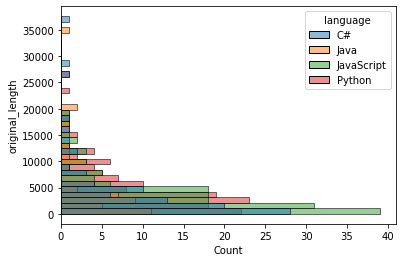

In [179]:
sns.histplot(data=df, y='original_length', hue='language')

<AxesSubplot:xlabel='Count', ylabel='length_diff'>

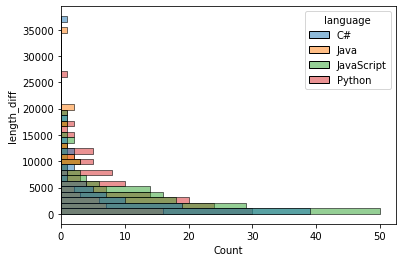

In [181]:
sns.histplot(data=df, y='length_diff', hue='language')

In [185]:
del 

,sentiment,original_length,length_diff,language
0,0.7717,7208,6713,JavaScript
1,0.9633,4943,4515,C#
2,0.0000,3587,3469,Python
3,0.0000,3964,3866,JavaScript
4,0.0000,5705,5689,JavaScript
...,...,...,...,...
427,0.9451,4046,3671,Python
428,0.0000,558,544,Python
429,0.0000,488,357,C#
430,0.8225,1633,1387,Python


In [189]:
from sklearn.preprocessing import MinMaxScaler

In [225]:
X_train, X_validate, X_test, y_train, y_validate, y_test = pr.split_data(df, explore=False)

In [245]:
tv = TfidfVectorizer()
XT_train = tv.fit_transform(X_train.lemmatized)
XT_val = tv.transform(X_validate.lemmatized)
XT_test = tv.transform(X_test.lemmatized)
pd.DataFrame(XT_train.todense(), 
             columns=tv.get_feature_names_out()).head(1)

,aabb,aaro,ab,ability,abis,able,abramov,absence,absorb,abuild,...,york,youtube,yum,zdepth,zero,zip,ziptar,zodiusinfuser,zoom,zoomrotate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
idf_values = pd.Series(
    dict(
        zip(
            tv.get_feature_names_out(), tv.idf_)))
#values_to_remove = idf_values[idf_values > 3].index.tolist()

In [236]:
idf_values.describe()

count    4926.000000
mean        5.502317
std         0.537511
min         2.299283
25%         5.390325
50%         5.795791
75%         5.795791
max         5.795791
dtype: float64

In [286]:
# 5.65 -> sweet spot
values_to_remove = idf_values[idf_values > 5.65].index.tolist()

In [308]:
tv = TfidfVectorizer(stop_words=values_to_remove)
XT_train = tv.fit_transform(X_train.lemmatized)
XT_validate = tv.transform(X_validate.lemmatized)
XT_test = tv.transform(X_test.lemmatized)
pd.DataFrame(XT_train.todense(), 
             columns=tv.get_feature_names_out()).head(1)

,ab,ability,able,access,accessed,accompanying,according,account,accuracy,accurate,...,written,xml,yarn,year,yellow,yet,yield,youtube,zero,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
XT_train

<241x1617 sparse matrix of type '<class 'numpy.float64'>'
	with 8205 stored elements in Compressed Sparse Row format>

In [288]:
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(XT_train, y_train)
tree.score(XT_train, y_train)

0.6224066390041494

In [285]:
tree.score(XT_val, y_validate)

0.47115384615384615

In [2]:
#XF_train = X_train.iloc[:, 4:].copy()
#XF_validate = X_validate.iloc[:, 4:].copy()
#XF_test = X_test.iloc[:, 4:].copy()

In [332]:
# scale
to_scale = ['sentiment', 'original_length',  'length_diff','clean_length']
sc = MinMaxScaler()
sc.fit(XF_train[to_scale])
XF_train[to_scale] = sc.transform(XF_train[to_scale])
XF_validate[to_scale] = sc.transform(XF_validate[to_scale])
XF_test[to_scale] = sc.transform(XF_test[to_scale])

In [333]:
X_train_complete = pd.concat([XF_train, pd.DataFrame(XT_train.todense(), columns=tv.get_feature_names_out(), index=XF_train.index)], 
          axis=1)
X_validate_complete = pd.concat([XF_validate, pd.DataFrame(XT_validate.todense(), columns=tv.get_feature_names_out(), index=XF_validate.index)], 
          axis=1)
X_test_complete = pd.concat([XF_test, pd.DataFrame(XT_test.todense(), columns=tv.get_feature_names_out(), index=XF_test.index)], 
          axis=1)

In [305]:
X_train.shape, XT_train.shape, XF_train.shape

((241, 16), (241, 1617), (241, 12))

In [335]:
# complete set: bag of words + feature eng
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train_complete, y_train)
tree.score(X_train_complete, y_train)

0.6224066390041494

In [336]:
tree.score(X_validate_complete, y_validate)

0.47115384615384615

In [322]:
# complete set: bag of words + feature eng
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(XT_train, y_train)
tree.score(XT_train, y_train)

0.6224066390041494

In [334]:
X_train_complete

,sentiment,original_length,clean_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,...,written,xml,yarn,year,yellow,yet,yield,youtube,zero,zip
271,0.456904,0.262251,0.000606,0.262051,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.540160,0.027498,0.038285,0.007324,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.456904,0.075758,0.007273,0.071957,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.498885,0.172625,0.016617,0.163941,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.456904,0.006309,0.004344,0.004021,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.048725,0.114036,0.002374,0.112836,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.238349,0.094445,0.000354,0.094301,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.456904,0.467591,0.005000,0.465166,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.999837,0.633135,0.617758,0.307696,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
# engineered features only
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train1, y_train)
tree.score(X_train1, y_train)

0.4107883817427386

In [330]:
tree.score(X_validate1, y_validate)

0.36538461538461536

In [244]:
'part' in values_to_remove

False

In [324]:
y_train.value_counts(normalize=True)

JavaScript    0.352697
Python        0.319502
C#            0.215768
Java          0.112033
Name: language, dtype: float64

In [331]:
X_train_complete

,sentiment,original_length,clean_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,...,written,xml,yarn,year,yellow,yet,yield,youtube,zero,zip
271,0.456904,0.262251,12,0.262051,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.540160,0.027498,758,0.007324,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.456904,0.075758,144,0.071957,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.498885,0.172625,329,0.163941,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.456904,0.006309,86,0.004021,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.048725,0.114036,47,0.112836,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.238349,0.094445,7,0.094301,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.456904,0.467591,99,0.465166,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.999837,0.633135,12231,0.307696,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
